In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from ComplexCells import detect_square, detect_triangle, classify
from SearchParadigm import get_paradigm
import time;

In [2]:
def feature_search(color_map, shape_map):
# Since this search is based on just one feature, counting the occurrences of each type i.e. 
# numbers of blues and numbers of reds. The one which gives only 1 occurrence will be the odd one.
    arg_red = np.asarray(np.nonzero(1 - color_map))
    arg_blue = np.asarray(np.nonzero(color_map))

    arg_sq = np.asarray(np.nonzero(1 - shape_map))
    arg_tr = np.asarray(np.nonzero(shape_map))
    
    if arg_red.shape[1] == 1:
        return (1, int(arg_red))
    elif arg_blue.shape[1] == 1:
        return (1, int(arg_blue))
    elif arg_sq.shape[1] == 1:
        return (1, int(arg_sq))
    elif arg_tr.shape[1] == 1:
        return (1, int(arg_tr))
    
    time.sleep(0.02)
    
    return (0, -1)

In [3]:
def conjunction_search(color_map, shape_map):
# After going at every position object will be classified on the basis of both features 
# one which yields only one occurrence will be the odd one.

    b_tr = []
    r_tr = []
    b_sq = []
    r_sq = []
    
    for i in range(color_map.shape[0]):
        if (color_map[i] == 0): #red color
            if (shape_map[i] == 0): #square shape
                r_sq.append(i)
            else: 
                r_tr.append(i)
        else:
            if (shape_map[i] == 0): #square shape
                b_sq.append(i)
            else: 
                b_tr.append(i)
                
        time.sleep(0.015)
                
    if len(b_tr) == 1:
        return (1, int(b_tr[0]))
    elif len(r_tr) == 1:
        return (1, int(r_tr[0]))
    elif len(b_sq) == 1:
        return (1, int(b_sq[0]))
    elif len(r_sq) == 1:
        return (1, int(r_sq[0]))
    
    time.sleep(0.02)
    
    return (0, -1)

In [4]:
# | returns color | 0 - red | 1 - blue |
def get_color(img):
    k = np.sum(img, axis=(0,1))
    ch = np.argmax(k) #channel having highest intensity
    
    if ch == 0:
        return 0
    else:
        return 1

In [5]:
def get_feature_map(object_location, paradigm_img):
    # | create shape map | 0 - square | 1 - triangle |
    shape_map = np.zeros(object_location.shape)
    for i in range(shape_map.shape[0]):
        img = paradigm_img[int(object_location[i]/12)*120:(int(object_location[i]/12)+1)*120, int(object_location[i]%12)*120:(int(object_location[i]%12)+1)*120, :] 
        shape_map[i] = classify(img)

    # | create color map | 0 - red | 1 - blue |
    color_map = np.zeros(object_location.shape)
    for i in range(color_map.shape[0]):
        img = paradigm_img[int(object_location[i]/12)*120:(int(object_location[i]/12)+1)*120, int(object_location[i]%12)*120:(int(object_location[i]%12)+1)*120, :]
        color_map[i] = classify(img)
        
    return (shape_map, color_map)

In [6]:
RT_F = []
print("Simulating Feature Search")
for N in range(2,145):
    print("for object no: ", N)
    object_location, paradigm_img = get_paradigm(N, 0)
    shape_map, color_map = get_feature_map(object_location, paradigm_img)
    
    ticks = time.time()
    found, i = feature_search(color_map, shape_map)
    RT_F.append(time.time() - ticks)

In [13]:
RT_C = []
print("\nSimulating Conjunction Search")
for N in range(2,145):
    print("for object no: ", N)
    object_location, paradigm_img = get_paradigm(N, 1)
    shape_map, color_map = get_feature_map(object_location, paradigm_img)
    
    ticks = time.time()
    found, i = conjunction_search(color_map, shape_map)
    RT_C.append(time.time() - ticks)

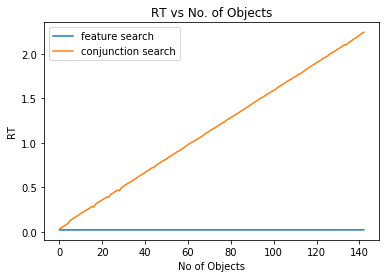

In [31]:
plt.plot(RT_F, label='feature search')
plt.plot(RT_C, label='conjunction search')

plt.ylabel('RT')
plt.xlabel('No of Objects')
plt.title('RT vs No. of Objects')
plt.legend()
plt.savefig("RTvsN.png", dpi = 200)